In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import soundfile as sf
from IPython.display import clear_output
import torch
import torchvision
from torchvision import models

In [2]:
import os
import sys
sys.path.append("./../pyfiles/")
from util import plot_spectrogram, play_audio
from WaveGlow import call_waveglow, audio_generation
from dataset import Dataset_mel, transform_mel
from FID import FID

---

<font size="5">Overviews</font>
1. Introduction
1. Preparation
1. Comparison in models
1. Comparison in emotions
1. Comparison in FID
1. Save mel-spectrogram and audio

---

# Introduction
---
Since the notebook of the results is divided into 2, I'm going to combine 2 results in this notebook and compare them among all models. Please run the notebooks below to get the result first, or you can check the result in README as well.
- `03_GAN_audio_AM.ipynb`
- `05_GAN_mel_AM.ipynb`

---

# Preparation
---
First of all, let's define some variables and call data or WaveGlow for result.

---

In [3]:
device = "cuda"
emotions = ["neutral", "happy", "sad", "angry"] # the labels of classes
data_type = ["mel_wavenet", "mel_lstm", "mel_cnn", "audio_wavenet", "audio_lstm"] # name of models
root = "../data/results/GAN_100/"

In [4]:
all_data = {}
for dt in data_type:
    save_path = f"{root}{dt}/results_{dt}.pkl"
    with open(save_path, mode='rb') as f:
        data = pickle.load(f)
    all_data[dt] = data

In [5]:
model_path = "../data/parameters/waveglow_official.pth"
waveglow = call_waveglow(model_path, True, device)
fs = 22050

# Comparison in models
---
First of all, let's take a look at the differences among models.

- *emotion*: the target emotmion
- *display_audio*: whether include the audio when display the result or not
- *display_waveform*: whether include the waveform when display the result or not



---

sample number: 0


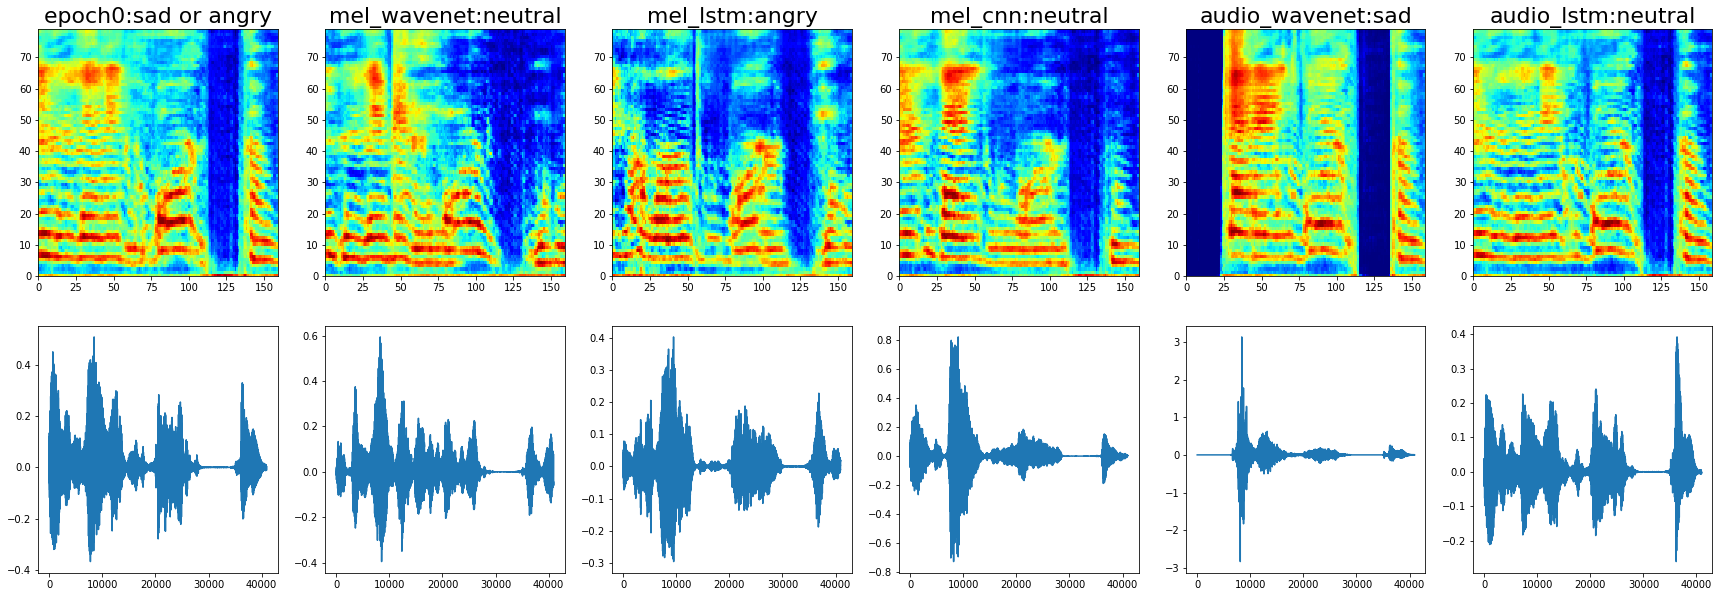

-------------------------------------------------------------------
sample number: 1


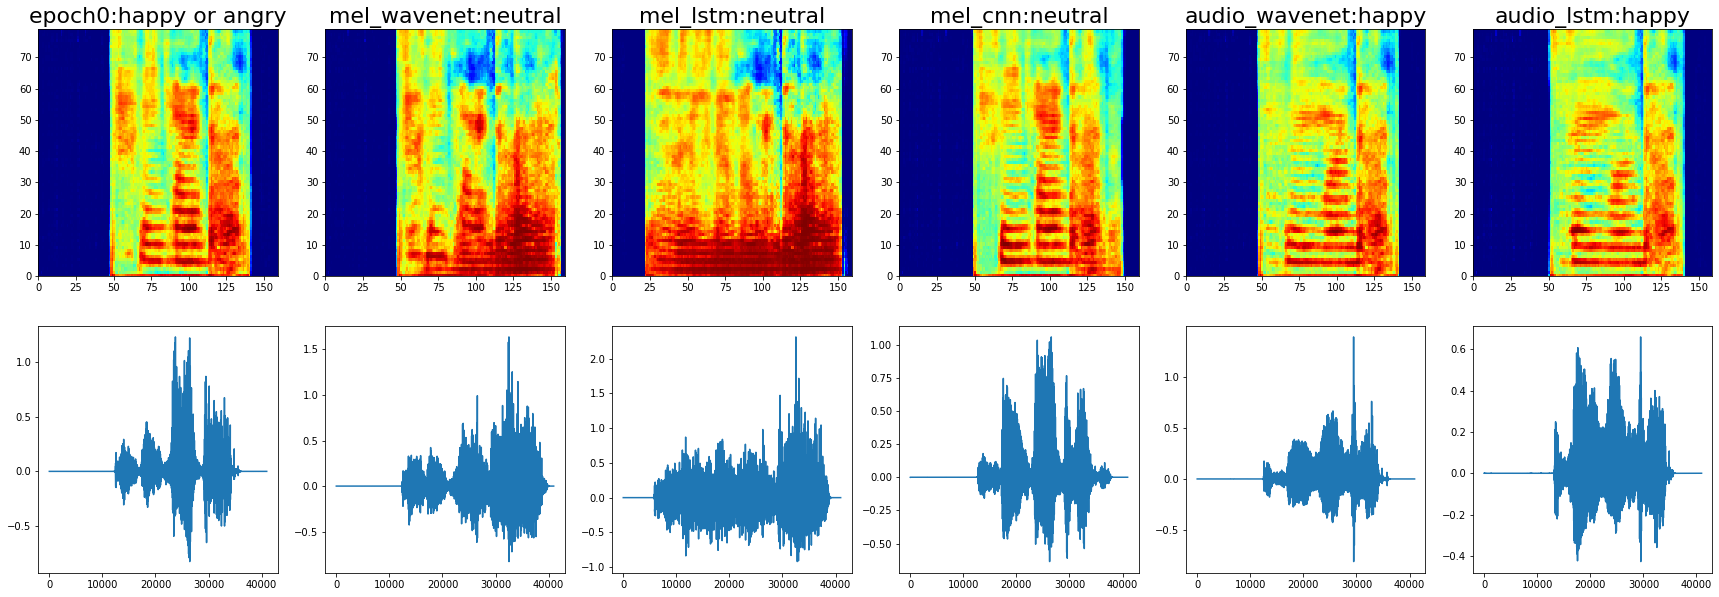

-------------------------------------------------------------------
sample number: 2


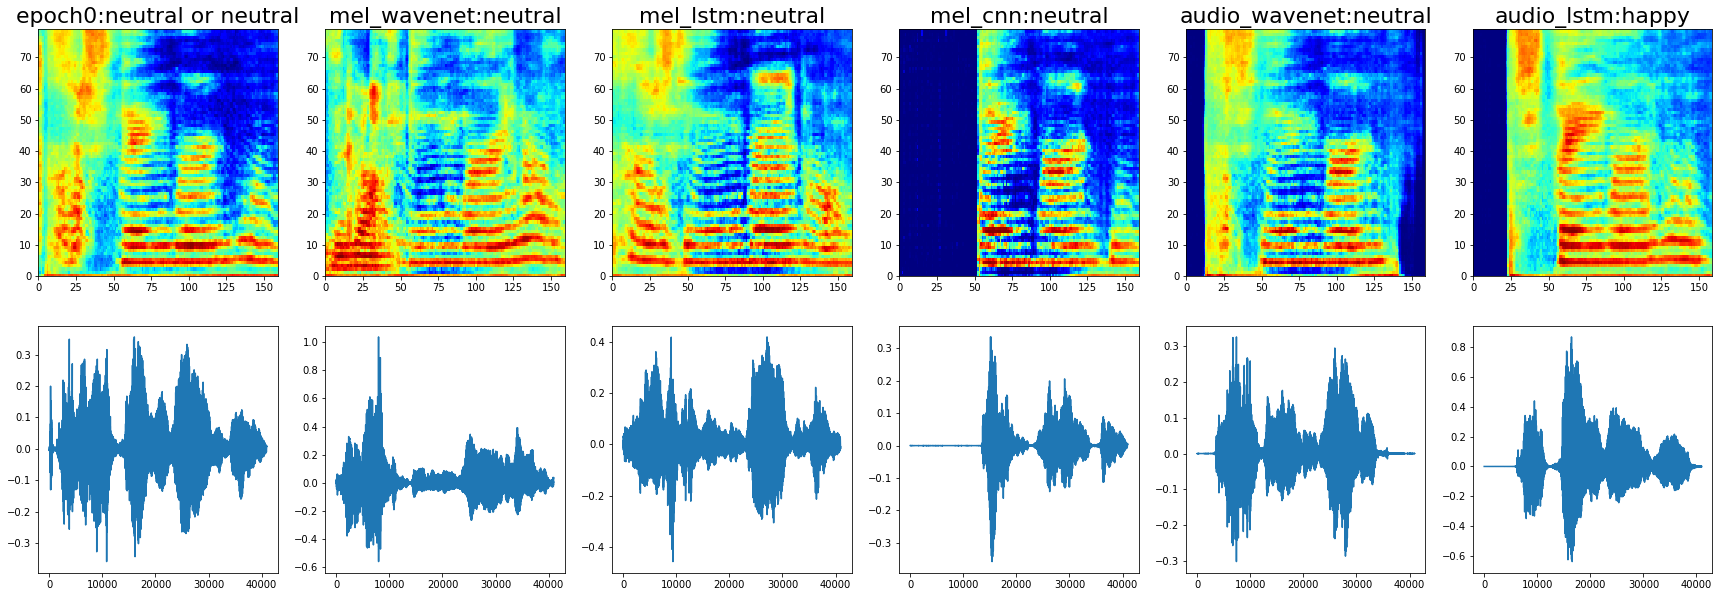

-------------------------------------------------------------------
sample number: 3


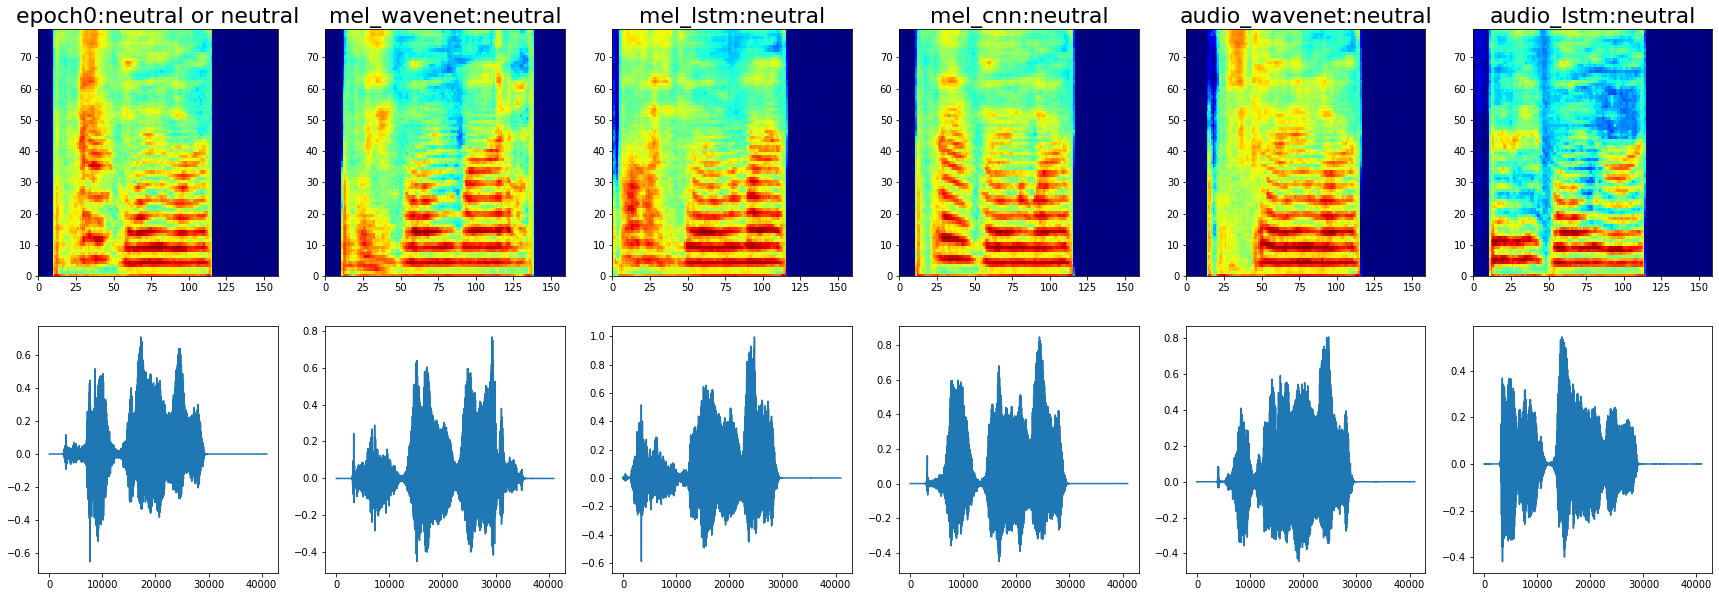

-------------------------------------------------------------------
sample number: 4


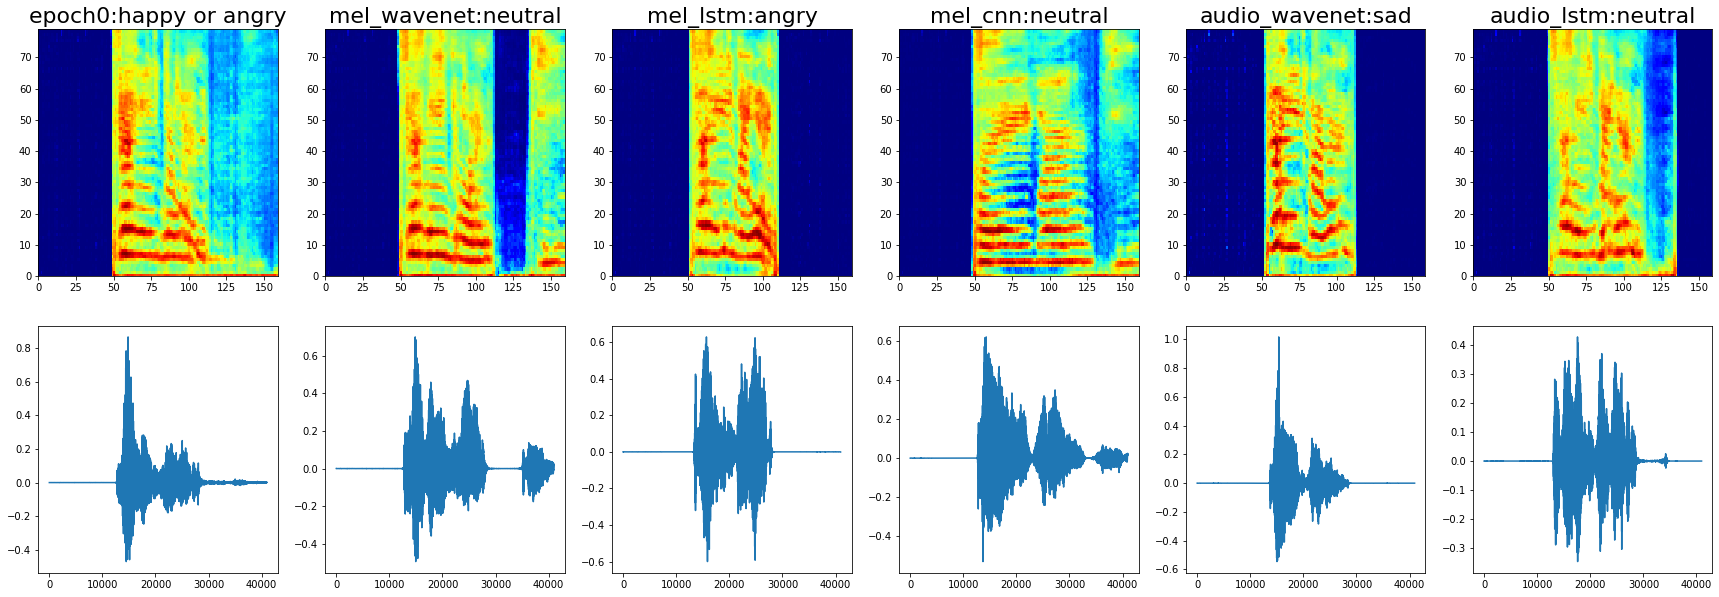

-------------------------------------------------------------------


In [6]:
# ----------- adjustable parameters ------------- #
emotion = "neutral"
display_num = 5
display_audio = True
display_waveform = True
# ----------------------------------------------- #

for i in range(display_num):
    print(f"sample number: {i}")
    fig = plt.figure(figsize=(30,5*(int(display_waveform)+1)))
    M = all_data["mel_wavenet"][emotion][i]["mel"][0][0][0]
    plot_spectrogram(M, fig, ((int(display_waveform)+1), 6, 1), title=f"epoch0:{emotions[all_data['mel_wavenet'][emotion][i]['prediction'][0]]} or {emotions[all_data['audio_wavenet'][emotion][i]['prediction'][0]]}", title_font=22)
    
    mel = torch.tensor(all_data["mel_wavenet"][emotion][i]["mel"][0][0]).to(device)
    audio, noise = audio_generation(mel, waveglow)
    if display_waveform:
        ax = fig.add_subplot(2, 6, 7)
        ax.plot(audio)
    if display_audio:
        play_audio(audio, fs)
    
    for j in range(len(data_type)):
        M = all_data[data_type[j]][emotion][i]["mel"][-1][0][0]
        plot_spectrogram(M, fig, (int(display_waveform)+1, 6, j+2), title=f"{data_type[j]}:{emotions[all_data[data_type[j]][emotion][i]['prediction'][-1]]}", title_font=22)
        
        mel = torch.tensor(all_data[data_type[j]][emotion][i]["mel"][-1][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        if display_waveform:
            ax = fig.add_subplot(2, 6, j+8)
            ax.plot(audio)
        if display_audio:
            play_audio(audio, fs)
    plt.show()
    print("-------------------------------------------------------------------")

---
**neutral**:

It's obvious in no.0 and no.4, especially in no.4. It wasn't classified as 'neutral' in the first place. However, some models have greatly succeeded in optimization such as mel_cnn and audio_wavenet. The intonation became monotonous as if there is no emotion at all. In general, the neutral sound has horizontal lines in mel-spectrogram and it leads the mundane sound.

**sad**:

It seems more successful in no.0 and no.7. In no.0, mel-spectrogram based models have better results. The ups and downs of the intonation have reduced and the strong accent has transferred from the beginning to the middle as obviously shown in the waveform. As for no.7, all models had great results but a mel_cnn based model. it appears to have a strong intonation between the beginning and the middle. To sum up, intonation is weaker in the end.

**happy**:

We can find the unambiguous results in no.3. Most models have changed the mel-spectrogram obviously to reshape it to have a mountainous line in the middle of a speech. When we listen to the sounds, we can hear the drastic surge of the intonation in the middle.

**angry**:

As for the result in no.0 and no.6, The gap between the highs and lows of the intonation is intense and it's changed on and off quickly. As for the model performance, mel-spectrogram based models are superior to the audio-based models, especially in no.6.

---

## Comparison in emotions
---
Next, let's take a look at the differences among emotions.

- *model_type*: the structure of the classifier used for AM

---

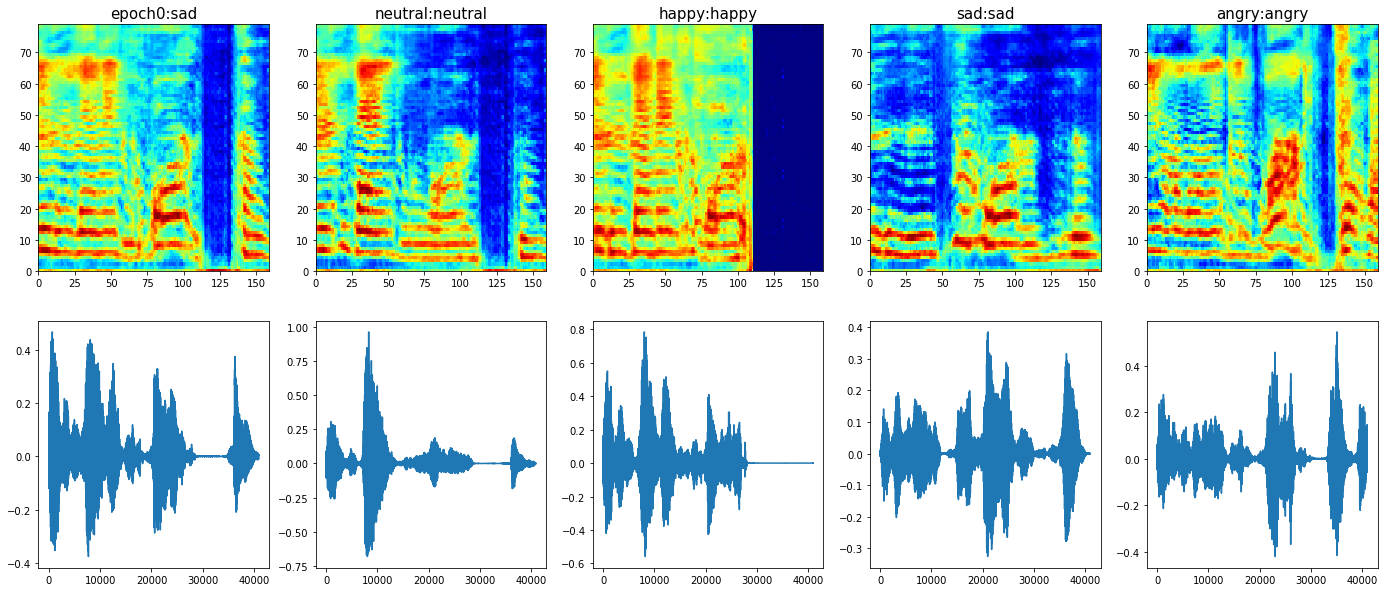

-------------------------------------------------------------------


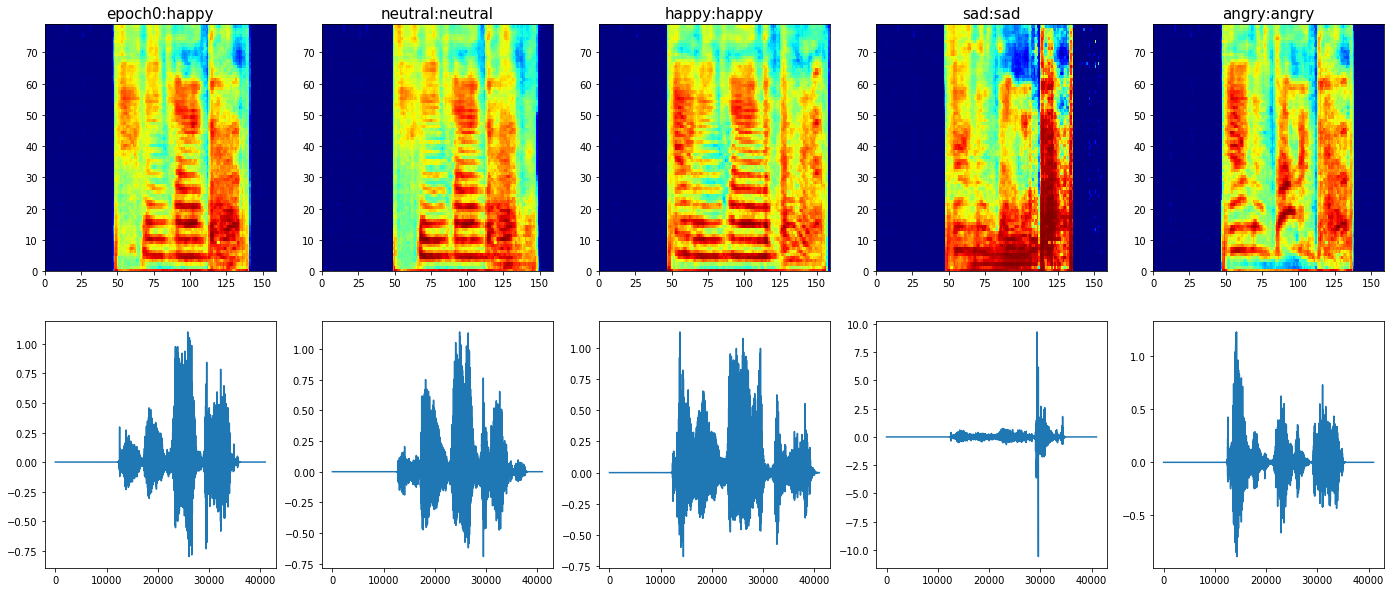

-------------------------------------------------------------------


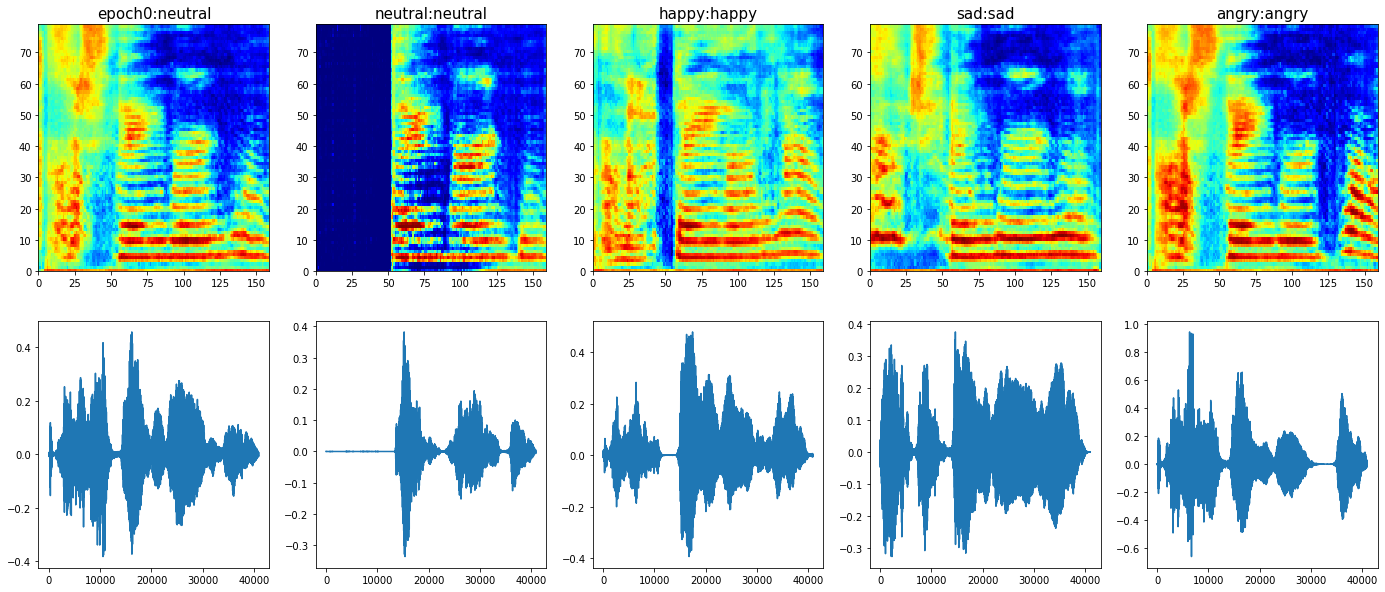

-------------------------------------------------------------------


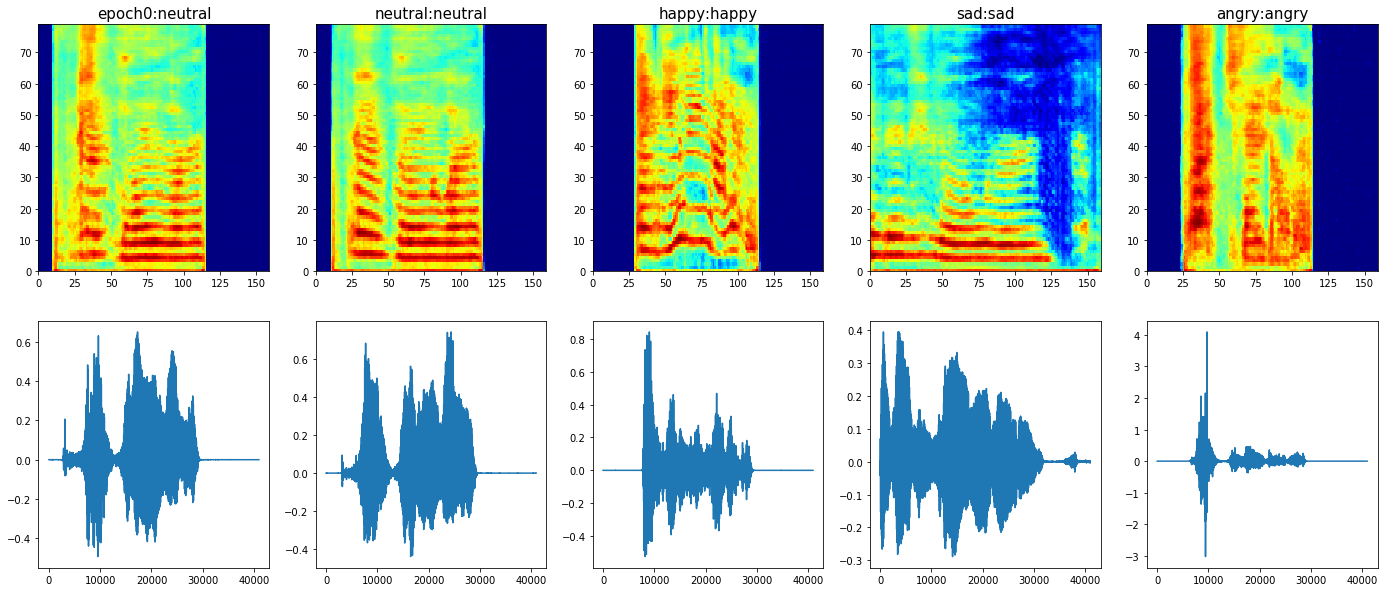

-------------------------------------------------------------------


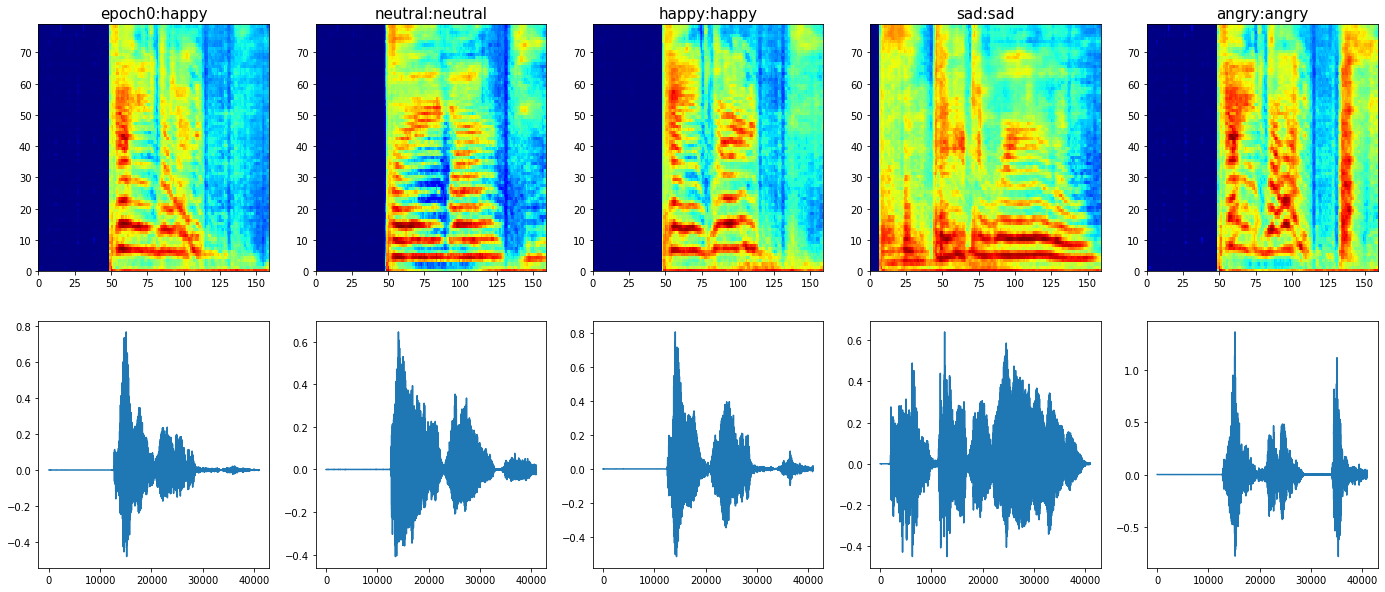

-------------------------------------------------------------------


In [7]:
# ----------- adjustable parameters ------------- #
model_type = "mel_cnn"
display_num = 5
display_audio = True
display_waveform = True
# ----------------------------------------------- #

for i in range(display_num):
    fig = plt.figure(figsize=(24,5*(int(display_waveform)+1)))
    M = all_data[model_type]["neutral"][i]["mel"][0][0][0]
    plot_spectrogram(M, fig, (int(display_waveform)+1, len(emotions)+1, 1), title=f"epoch0:{emotions[all_data['mel_wavenet'][emotion][i]['prediction'][0]]}")
    
    mel = torch.tensor(all_data["mel_wavenet"]["neutral"][i]["mel"][0][0]).to(device)
    audio, noise = audio_generation(mel, waveglow)
    if display_waveform:
        ax = fig.add_subplot(2, len(emotions)+1, len(emotions)+2)
        ax.plot(audio)
    if display_audio:
        play_audio(audio, fs)
    
    for j in range(len(emotions)):
        M = all_data[model_type][emotions[j]][i]["mel"][-1][0][0]
        plot_spectrogram(M, fig, (int(display_waveform)+1, len(emotions)+1, j+2), title=f"{emotions[j]}:{emotions[all_data[model_type][emotions[j]][i]['prediction'][-1]]}")
        
        mel = torch.tensor(all_data[model_type][emotions[j]][i]["mel"][-1][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        
        if display_waveform:
            ax = fig.add_subplot(2, len(emotions)+1, j+7)
            ax.plot(audio)
        if display_audio:
            play_audio(audio, fs)
            
    plt.show()
    print("-------------------------------------------------------------------")

## Comparison in FID
---
Next, in order not to be subjective, we employ the well-known quantitative evaluation, or FID score. Originally, the inception model, used in this method, was pre-trained with ImageNet, which is far different from mel-spectrogram distribution. Therefore, we prepared the model pretrained with the datasets used in the GAN training, TESS and RAVDESS.

---
Parameters and Variables

---

In [8]:
# ----- adjustable parameters ----- #
emotions = ["neutral", "happy", "sad", "angry"] # the labels of classes
target_length = 2**15 # data length, about 1.5 seconds
root_TESS = "../../dataset/TESS/preprocessed/" # root path of the TESS dataset
root_RAVDESS = "../../dataset/RAVDESS/preprocessed/" # root path of the RAVDESS dataset
# --------------------------------- #

---
call each dataset

---

In [14]:
dataset = {}
dataset["tess"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="train", dataset="TESS")
dataset["rav"] = Dataset_mel(root_TESS, root_RAVDESS, transform_mel, emotions, target_length, mode="train", dataset="RAVDESS")

---
get dataset for evaluation.

---

In [47]:
num = {}
num["tess"] = 80
num["rav"] = 80

In [48]:
source = {}
source["tess"] = {}
source["rav"] = {}
for i, emotion in enumerate(emotions):
    for ds_type in ["tess", "rav"]:
        np.random.seed(0)
        indexes = np.random.choice(len(dataset[ds_type]), len(dataset[ds_type]), replace=False)
        source[ds_type][emotion] = []
        n = 0
        while len(source[ds_type][emotion])<(num[ds_type]*2):
            data = dataset[ds_type][indexes[n]]
            if data[1] == i:
                x = np.repeat(np.array(data[0]), 3, axis=0)
                source[ds_type][emotion].append(x)
            n += 1
            
        source[ds_type][emotion] = torch.tensor(source[ds_type][emotion])

---
You can evaluate your result with the code below.

***pretraining***: the dataset used for the inception model's training: "ImageNet" or "sound"

---
Firstly, the inception model pre-trained with sound datasets.

---

In [49]:
# ----- adjustable parameters ----- #
pretraining = "sound"
# --------------------------------- #

FID_scores = []
clear_output(wait=True)
for emotion in emotions:
    print(emotion)
    for dataset_type in ["tess", "rav"]:
        print("    ", dataset_type)
        fid = FID(pretraining=pretraining, len_classes=len(emotions))
        x = source[dataset_type][emotion][:num[dataset_type]]
#         x = source[dataset_type][emotion][:data_num]
        fid.init_source_feature(x)
        
        scores = []
#         y = train[dataset_type][emotion]
        y = source[dataset_type][emotion][num[dataset_type]:]
        score = fid.get_FID(y)
        scores.append(score)
        print("        ", "original", score)

        for dt in data_type:
            for i in range(num[dataset_type]):
                M = all_data[dt][emotion][i]["mel"][-1]
                M = np.repeat(M, 3, axis=1)
                if i == 0:
                    y = M
                else:
                    y = np.concatenate([y, M], axis=0)
                    
            y = torch.tensor(y)
            score = fid.get_FID(y)

            scores.append(score)
            print("        ", dt, score)

        FID_scores.append(scores)
        
index = []
for emotion in emotions:
    for dataset_type in ["TESS", "RAVDESS"]:
        index.append((emotion, dataset_type))
index = pd.MultiIndex.from_tuples(index, names=['emotion','dataset'])
print("FID score")
pd.DataFrame(np.round(np.array(FID_scores), 3), index=index, columns=["original"]+data_type)

neutral
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 2.3891241988598595
         mel_wavenet 511.0880435002792
         mel_lstm 338.2686412734401
         mel_cnn 306.9792507151034
         audio_wavenet 482.2453146170337
         audio_lstm 786.8225501708692
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 12.102658243046482
         mel_wavenet 261.9175837155051
         mel_lstm 281.96057106740966
         mel_cnn 175.16531511835237
         audio_wavenet 196.7210648127615
         audio_lstm 333.12259041793857
happy
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 2.342811294810537
         mel_wavenet 390.4203751185094
         mel_lstm 385.26871217972644
         mel_cnn 254.3867941840302
         audio_wavenet 340.72428511347204
         audio_lstm 406.72436333661375
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 6.468012209094502
         mel_wavenet 568.4271061439623
         mel_lstm 587.5023256169277
         mel_cnn 399.81079875819944
         audio_wavenet 522.3550121457222
         audio_lstm 618.0146507941672
sad
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 0.9691428690895965
         mel_wavenet 96.63492260878118
         mel_lstm 63.138225430084006
         mel_cnn 38.8618976584322
         audio_wavenet 155.6507187271623
         audio_lstm 213.15270903514823
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 9.097706348112792
         mel_wavenet 110.9312111247312
         mel_lstm 84.24590846729674
         mel_cnn 47.3173449235126
         audio_wavenet 207.25434966664548
         audio_lstm 260.01398484349914
angry
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 0.8684921263553557
         mel_wavenet 167.20258942325813
         mel_lstm 327.0667555930372
         mel_cnn 70.73633706562039
         audio_wavenet 437.0718233015819
         audio_lstm 482.26536843295537
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 3.662178882812648
         mel_wavenet 192.8749392836066
         mel_lstm 730.3355531359723
         mel_cnn 100.69611983998438
         audio_wavenet 856.1997537587365
         audio_lstm 945.9290785670938
FID score


original  mel_wavenet  mel_lstm  mel_cnn  audio_wavenet  \
emotion dataset                                                            
neutral TESS        2.389      511.088   338.269  306.979        482.245   
        RAVDESS    12.103      261.918   281.961  175.165        196.721   
happy   TESS        2.343      390.420   385.269  254.387        340.724   
        RAVDESS     6.468      568.427   587.502  399.811        522.355   
sad     TESS        0.969       96.635    63.138   38.862        155.651   
        RAVDESS     9.098      110.931    84.246   47.317        207.254   
angry   TESS        0.868      167.203   327.067   70.736        437.072   
        RAVDESS     3.662      192.875   730.336  100.696        856.200   

                 audio_lstm  
emotion dataset              
neutral TESS        786.823  
        RAVDESS     333.123  
happy   TESS        406.724  
        RAVDESS     618.015  
sad     TESS        213.153  
        RAVDESS     260.014  
angry   TESS        482.265  
        RAVDESS     945.929

---
Then, the inception model pre-trained with ImageNet.

---

In [50]:
# ----- adjustable parameters ----- #
pretraining = "ImageNet"
# --------------------------------- #

FID_scores = []
clear_output(wait=True)
for emotion in emotions:
    print(emotion)
    for dataset_type in ["tess", "rav"]:
        print("    ", dataset_type)
        fid = FID(pretraining=pretraining, len_classes=len(emotions))
        x = source[dataset_type][emotion][:num[dataset_type]]
#         x = source[dataset_type][emotion][:data_num]
        fid.init_source_feature(x)
        
        scores = []
#         y = train[dataset_type][emotion]
        y = source[dataset_type][emotion][num[dataset_type]:]
        score = fid.get_FID(y)
        scores.append(score)
        print("        ", "original", score)

        for dt in data_type:
            for i in range(num[dataset_type]):
                M = all_data[dt][emotion][i]["mel"][-1]
                M = np.repeat(M, 3, axis=1)
                if i == 0:
                    y = M
                else:
                    y = np.concatenate([y, M], axis=0)
                    
            y = torch.tensor(y)
            score = fid.get_FID(y)

            scores.append(score)
            print("        ", dt, score)

        FID_scores.append(scores)
        
index = []
for emotion in emotions:
    for dataset_type in ["TESS", "RAVDESS"]:
        index.append((emotion, dataset_type))
index = pd.MultiIndex.from_tuples(index, names=['emotion','dataset'])
print("FID score")
pd.DataFrame(np.round(np.array(FID_scores), 3), index=index, columns=["original"]+data_type)

neutral
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /opt/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
22.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

60.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

98.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid cr

         original 46.046814167388575
         mel_wavenet 152.79457035718136
         mel_lstm 144.68430971870254
         mel_cnn 129.93144338212858
         audio_wavenet 137.95654778462495
         audio_lstm 145.8685065969289
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 47.85184671480506
         mel_wavenet 125.30761410529405
         mel_lstm 131.57196738589695
         mel_cnn 118.69396826155291
         audio_wavenet 121.58237319002524
         audio_lstm 129.17834309705484
happy
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 50.469532467235005
         mel_wavenet 159.5790530435957
         mel_lstm 157.91110400695362
         mel_cnn 151.20438901476956
         audio_wavenet 143.4338923937377
         audio_lstm 144.22468221437123
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 53.169694120940406
         mel_wavenet 133.2711815694551
         mel_lstm 137.86308573705892
         mel_cnn 123.94774448069319
         audio_wavenet 122.58939990490401
         audio_lstm 123.85416252364716
sad
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 59.390492465690016
         mel_wavenet 136.28948591679267
         mel_lstm 133.83290857655828
         mel_cnn 124.60452231154014
         audio_wavenet 120.32566938197127
         audio_lstm 118.46087204186412
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 53.75222441481445
         mel_wavenet 131.04816248086937
         mel_lstm 151.77945529542558
         mel_cnn 125.16672103360784
         audio_wavenet 152.0885889451644
         audio_lstm 132.56921317767686
angry
     tess


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 56.3256594930142
         mel_wavenet 154.3770545008651
         mel_lstm 160.97128512064842
         mel_cnn 151.23350331995363
         audio_wavenet 149.7686762216937
         audio_lstm 144.53368794490444
     rav


Using cache found in /opt/.cache/torch/hub/pytorch_vision_v0.5.0


         original 51.993500795036866
         mel_wavenet 157.0888587590635
         mel_lstm 157.42170577081262
         mel_cnn 124.33877801982337
         audio_wavenet 138.70093953251614
         audio_lstm 135.94736119974402
FID score


original  mel_wavenet  mel_lstm  mel_cnn  audio_wavenet  \
emotion dataset                                                            
neutral TESS       46.047      152.795   144.684  129.931        137.957   
        RAVDESS    47.852      125.308   131.572  118.694        121.582   
happy   TESS       50.470      159.579   157.911  151.204        143.434   
        RAVDESS    53.170      133.271   137.863  123.948        122.589   
sad     TESS       59.390      136.289   133.833  124.605        120.326   
        RAVDESS    53.752      131.048   151.779  125.167        152.089   
angry   TESS       56.326      154.377   160.971  151.234        149.769   
        RAVDESS    51.994      157.089   157.422  124.339        138.701   

                 audio_lstm  
emotion dataset              
neutral TESS        145.869  
        RAVDESS     129.178  
happy   TESS        144.225  
        RAVDESS     123.854  
sad     TESS        118.461  
        RAVDESS     132.569  
angry   TESS        144.534  
        RAVDESS     135.947

# Save Audio
---
You can save the audio with the code below.

---

In [44]:
# ----- adjustable parameters ----- #
root = "./../data/results/"
root_audio = root + "audio/"
root_model = root_audio + "GAN_100_sample/"
save = True
# --------------------------------- #

os.makedirs(root, exist_ok=True)
os.makedirs(root_audio, exist_ok=True)
os.makedirs(root_model, exist_ok=True)
for model_type in data_type:
    print(model_type)
    model_path = root_model + model_type + "/"
    os.makedirs(model_path, exist_ok=True)
    for emotion in emotions:
        print("    ", emotion)
        emotion_path = model_path + emotion + "/"
        os.makedirs(emotion_path, exist_ok=True)
        for i in range(len(all_data[model_type][emotion])):
            mel = torch.tensor(all_data[model_type][emotion][i]["mel"][-1][0]).to(device)
            audio, noise = audio_generation(mel, waveglow)
            save_path = emotion_path + f"{model_type}_{emotion}_sample_{i}.wav"
            if save:
                sf.write(save_path, audio, fs, subtype='PCM_24')
                
model_path = root_model + "original/"
print("original")
os.makedirs(model_path, exist_ok=True)
for emotion in emotions:
    print("    ", emotion)
    emotion_path = model_path + emotion + "/"
    os.makedirs(emotion_path, exist_ok=True)
    for i in range(len(all_data[model_type][emotion])):
        mel = torch.tensor(all_data[model_type][emotion][i]["mel"][0][0]).to(device)
        audio, noise = audio_generation(mel, waveglow)
        save_path = emotion_path + f"original_{emotion}_sample_{i}.wav"
        if save:
            sf.write(save_path, audio, fs, subtype='PCM_24')

mel_wavenet
     neutral
     happy
     sad
     angry
mel_lstm
     neutral
     happy
     sad
     angry
mel_cnn
     neutral
     happy
     sad
     angry
audio_wavenet
     neutral
     happy
     sad
     angry
audio_lstm
     neutral
     happy
     sad
     angry
original
     neutral
     happy
     sad
     angry
